# L3 Maths – Analyse Numérique – TP2

Université de Rennes - UFR Mathématiques ([Boutin B](mailto:benjamin.boutin@univ-rennes.fr))

Ce TP a pour sujet la résolution de systèmes linéaires avec application à un modèle d'élasticité.

---
---

**Étudiant : BONDU / Loïc**  
<div class="alert alert-block alert-danger">
    Travail à déposer sur Moodle après export au format `html`.
</div>

---
---

<h1>Contenu<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Élasticité-linéaire-et-équation-de-Poisson" data-toc-modified-id="Élasticité-linéaire-et-équation-de-Poisson-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Élasticité linéaire et équation de Poisson</a></span><ul class="toc-item"><li><span><a href="#Le-modèle-à-l'étude-et-son-approximation-par-différences-finies" data-toc-modified-id="Le-modèle-à-l'étude-et-son-approximation-par-différences-finies-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Le modèle à l'étude et son approximation par différences finies</a></span></li><li><span><a href="#Cas-d'une-élasticité-constante" data-toc-modified-id="Cas-d'une-élasticité-constante-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cas d'une élasticité constante</a></span></li><li><span><a href="#Cas-d'une-élasticité-inhomogène" data-toc-modified-id="Cas-d'une-élasticité-inhomogène-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Cas d'une élasticité inhomogène</a></span></li></ul></li><li><span><a href="#Stockage-creux" data-toc-modified-id="Stockage-creux-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Stockage creux</a></span><ul class="toc-item"><li><span><a href="#Exemple-préliminaire" data-toc-modified-id="Exemple-préliminaire-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exemple préliminaire</a></span></li><li><span><a href="#Adaptation-du-code-pour-le-problème-d'élasticité" data-toc-modified-id="Adaptation-du-code-pour-le-problème-d'élasticité-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Adaptation du code pour le problème d'élasticité</a></span></li><li><span><a href="#Positionnement-optimal-de-la-première-masse" data-toc-modified-id="Positionnement-optimal-de-la-première-masse-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Positionnement optimal de la première masse</a></span></li><li><span><a href="#Positionnement-optimal-des-deux-masses" data-toc-modified-id="Positionnement-optimal-des-deux-masses-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Positionnement optimal des deux masses</a></span></li></ul></li></ul></div>

## Élasticité linéaire et équation de Poisson


### Le modèle à l'étude et son approximation par différences finies

Une corde extensible élastique est suspendue en deux points du plan $(x,y)$ de coordonnées $(0,0)$ et $(1,0)$ et est soumise à un chargement qui en affecte la géométrie par effet de gravité dans la direction verticale $y$. Il est supposé que les forces internes d'élasticité de la corde, la force de gravité en tout point et la force d'attache aux supports s'équilibrent, si bien que la corde atteint une position d'équilibre. Il est également supposé que la position de la corde correspond alors au graphe d'une fonction $y=u(x)$ pour $x\in[0,1]$. 

Un modèle simple dans le cas de petites déformations, le chargement étant décrit par une masse linéïque $f(x)$ et le coefficient d'élasticité au point de position $(x,u(x))$ étant noté $a(x)>0$, est alors l'équation de Poisson suivante :  

\begin{equation}
\label{Elast}\tag{$P$}
\begin{aligned}
&\dfrac{d}{dx}\left(a(x)\dfrac{du}{dx}\right) = f(x),& 0<x<1,\\
&u(0)=u(1)=0. & 
\end{aligned}
\end{equation}

L'objectif est de déterminer une approximation de la solution $u$ régulière de ce **problème aux limites**.  
La méthode envisagée pourrait être généralisée à des problèmes analogues en dimension supérieure, utiles en dynamique de structures surfaciques ou volumiques.


Pour la résolution approchée du problème $(P)$, nous employons une stratégie de résolution qui s'appuie sur **une approximation en dimension finie**.  

Pour ce faire, un entier naturel non nul $n\in\mathbb{N}$ est introduit, à partir duquel est définie une discrétisation uniforme de l'intervalle d'espace $x\in[0,1]$. La quantité $h=(n+1)^{-1}$ est le pas de discrétisation et pour tout entier $i$, on note $x_i=ih$ et $x_{i+1/2}=(i+1/2)h$:

$$
0=x_0<x_{1/2}<x_1<\ldots<x_{n}<x_{n+1/2}<x_{n+1}=1.
$$

Les inconnues du problème approché (modèle discret en dimension finie) sont regroupées dans le vecteur $U=(u_1,\ldots,u_n)^T\in\mathbb{R}^n$, et sont solutions des équations aux différences finies suivantes:  

\begin{equation}
\label{ElastN}\tag{$P_n$}
\begin{aligned}
&\dfrac{1}{h}\left(a(x_{i+1/2})\dfrac{u_{i+1}-u_{i}}{h}-a(x_{i-1/2})\dfrac{u_{i}-u_{i-1}}{h}\right) = f(x_i),\quad 1\leq i \leq n,\\
&u_0 = u_{n+1} = 0.
\end{aligned}
\end{equation}

On attend du vecteur $U\in\mathbb{R}^n$ qu'il approche dans un certain sens le vecteur $(u(x_1),\ldots,u(x_n))^T$ représentant la solution exacte du problème aux limites, évalué dans les points de la discrétisation.

### Cas d'une élasticité constante

Le cas particulier d'une élasticité constante $a(x)=1$ correspond à l'équation

\begin{equation}
\label{ElastH}\tag{$A$}
\begin{aligned}
&\dfrac{d^2u}{dx^2}(x) = f(x), \quad & 0<x<1\\
&u(0)=u(1)=0. & 
\end{aligned}
\end{equation}

et à son approximation numérique

\begin{equation}
\label{ElastHN}\tag{$A_n$}
\begin{aligned}
&\dfrac{u_{i+1}-2u_i+u_{i-1}}{h^2} = f(x_i),\quad 1\leq i \leq n,\\
&u_0 = u_{n+1} = 0.
\end{aligned}
\end{equation}

---  
**Question 1.**  

Vérifier par un calcul à la main que pour le chargement homogène en espace $f(x)\equiv 1$, l'unique solution de $(A)$ est $u(x)=\tfrac{1}{2}x(x-1)$.  
Vous saisirez des éléments de démonstration dans la boîte de dialogue ci-dessous au format Markdown et LaTeX.

 

On a $u(x)=\tfrac12 x(x-1)$
donc
$u'(x)=x-\tfrac12x - \tfrac12$
puis $u'''x)=1$ 

Ainsi, On a bien : $\dfrac{d^2u}{dx^2}(x) = 1 $

Par ailleurs, Cette solution vérifie bien $u(0)=0=u(1)$

Alors, d'après le théorème de Cauchy-Lipschitz, cette solution est unique car solution d'un problème de Cauchy.

---  
**Question 2.**  

Implémenter la résolution numérique du modèle discret $(P_n)$ dans le cas du chargement homogène $f(x)\equiv 1$ et pour la valeur $n=5$, via les étapes suivantes:  
- Écrire la matrice `A` de taille `(n,n)` qui intervient dans la résolution
- Écrire le second membre `F` adéquat
- Résoudre le système linéaire `AU=F` à l'aide de la commande [`la.solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) de la bilbiothèque `numpy.linalg`.

In [ ]:
#!pip install -r requirements.txt
!pip install matplotlib
from math import *
from matlpotlib import *
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

h=1/(5+1)
A=(1/(h**2))*np.array([[-2,1,0,0,0],[1,-2,1,0,0],[0,1,-2,1,0],[0,0,1,-2,1],[0,0,0,1,-2]])
F=np.array([1,1,1,1,1])
print(A)

In [9]:
U=la.solve(A,F)
print(U)

[-0.06944444 -0.11111111 -0.125      -0.11111111 -0.06944444]


---  
**Question 3.**  
Vérifier que la solution `U` obtenue coïncide, à l'erreur machine près, avec le vecteur 

$$
\left(\tfrac{1}{2} x_i(x_i-1)\right)_{1\leq i \leq n}.
$$

Pour la construction du vecteur `x` des $(x_i)$, on pourra examiner la documentation `help(np.linspace)`.

In [10]:
#help(np.linspace)
X=np.linspace(0,1,num=7)
def u(x):
    return (1/2)*x*(x-1)
uvec=np.vectorize(u)
print(X,uvec(X))

[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ] [-0.         -0.06944444 -0.11111111 -0.125      -0.11111111 -0.06944444
  0.        ]


---  
**Question 4.**  
Reprendre la résolution de la *Question 2* pour des valeurs plus grandes de l'entier $n$ (par exemple $n=5,10,20$) et représenter les solutions dans le plan $(x,y)$. On prendra soin de concaténer la solution `U` avec les conditions de bord $u_0=u_{n+1}=0$ avant de procéder à la représentation (commande `np.concatenate`).

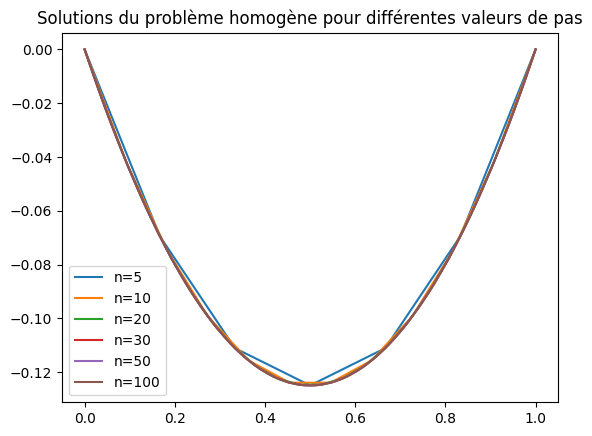

In [3]:
for n in [5,10,20,30,50,100]:
    h=1/(n+1)
    X=np.linspace(0,1,num=n+2)
    A=(1/(h**2))*(np.eye(n)*(-2)+np.diag(np.ones(n-1),1)+np.diag(np.ones(n-1),-1))
    F=np.ones(n)
    U=la.solve(A,F)
    plt.plot(X,np.concatenate((np.array([0]),U,np.array([0])),axis=None),label="n="+str(n))
plt.legend()
plt.title("Solutions du problème homogène pour différentes valeurs de pas")
plt.show()   

### Cas d'une élasticité inhomogène

Afin de traiter des élasticités plus générales, nous envisageons de définir une fonction `construction(n,a,f)` prenant en argument l'entier `n`, le nom des fonctions d'élasticité `a` et de chargement `f` et qui renvoie la matrice `A` et le second membre `F` qui intervient dans la résolution de $(P_n)$. 

---  
**Question 5.**  
*Sur le papier*, identifier avec soin la matrice $A\in\mathsf{M}_n(\mathbb{R})$ permettant de réécrire le problème $(P_n)$ d'inconnue $U\in\mathbb{R}^n$ sous la forme du système linéaire $AU=F$ où $F\in\mathbb{R}^n$ est le vecteur de composantes $F_j = f(x_j)$ pour $1\leq i \leq n$.

---  
**Question 6.**  
En partant des éléments de syntaxe suivants, compléter la construction de la matrice $A$ et du second membre $F$, 
```python
def construction(n,a,f):
    # n entier, a et f le nom des fonctions concernees
    h = 1./(n+1)
    x = np.linspace(0, 1, num=n+2)  #vecteur des x_0, ..., x_{n+1}
    y = x[:-1]+0.5*h                #vecteur des x_{1/2}, ..., x_{n+1/2}
    vec = a(y)
    ...                     
    return A,F
```

*Dans l'instruction de [`np.diag`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html), on sera vigilant à la taille des vecteurs `x` et `y` déjà introduits et on pourra employer les techniques de [slicing](https://numpy.org/doc/stable/user/basics.indexing.html).*  

**Attention. Cette question est assez essentielle pour la suite. On la testera dans la foulée sur le cas d'une élasticité et chargement constants, déjà traité précédemment.**

In [23]:
def construction(n,a,f):
    # n entier, a et f le nom des fonctions concernees
    h = 1./(n+1)
    x = np.linspace(0, 1, num=n+2)  #vecteur des x_0, ..., x_{n+1}
    y = x[:-1]+0.5*h                #vecteur des x_{1/2}, ..., x_{n+1/2}
    vec = a(y)
    A=np.zeros((n,n))
    A[0,0],A[0,1]=-vec[0]-vec[1],vec[1]
    for i in range(1,n-1):
        A[i][i],A[i,i-1],A[i,i+1]=-vec[i]-vec[i+1],vec[i],vec[i+1]
    A[n-1,n-2],A[n-1,n-1]=vec[-2],-vec[n]-vec[-1]
    A=A/(h**2)
    F=f(x)
    F=F[:-1]
    F=F[1:]
    return A,F

def atest(x):
    return 1
def ftest(x):
    return 1
atest=np.vectorize(atest)
ftest=np.vectorize(ftest)
print(construction(5,atest,ftest))

(array([[-72.,  36.,   0.,   0.,   0.],
       [ 36., -72.,  36.,   0.,   0.],
       [  0.,  36., -72.,  36.,   0.],
       [  0.,   0.,  36., -72.,  36.],
       [  0.,   0.,   0.,  36., -72.]]), array([1, 1, 1, 1, 1]))


---  
**Question 7.**

Désormais, les fonctions $a$ et $f$ sont choisies selon les paramètres suivants:  

$$
\begin{aligned}
a(x) &= 1 - 0.75\mathrm{e}^{-500(x-0.25)^2},\\
f(x) &= 0.1 + 0.75\mathrm{e}^{-1000(x-\xi_1)^2} + 2\mathrm{e}^{-1000(x-\xi_2)^2}.
\end{aligned}
$$

*Interprétation physique:* Dans la fonction $f$, la contribution constante peut s'interpréter comme la masse propre de la corde, tandis que les deux termes exponentiellement localisés modélisent deux masses suspendues, placées au voisinage des points d'abscisses respectives $\xi_1=0.2$ et $\xi_2=0.8$.  

Reprendre et exécuter le code ci-dessous, puis en vous inspirant du travail de la *Question 4* résoudre et tracer la solution pour des valeurs successives de l'entier $n$.  

```python
def a(x):
    return 1 - 0.75*np.exp(-500*(x-0.25)**2)


xi1 = 0.2
xi2 = 0.8


def f(x):
    return 0.1 + 0.75*np.exp(-1000*(x-xi1)**2) + 2*np.exp(-1000*(x-xi2)**2)


fig, ax1 = plt.subplots(figsize=(10, 3))
ax2 = ax1.twinx()
x = np.linspace(0, 1, 200)
ax1.plot(x, a(x), 'g-')
ax2.plot(x, f(x), 'b-')

ax1.set_xlabel('position')
ax1.set_ylabel('elasticité', color='g')
ax2.set_ylabel('chargement', color='b')
plt.show()
```

In [25]:
def a(x):
    return 1 - 0.75*np.exp(-500*(x-0.25)**2)


xi1 = 0.2
xi2 = 0.8


def f(x):
    return 0.1 + 0.75*np.exp(-1000*(x-xi1)**2) + 2*np.exp(-1000*(x-xi2)**2)


fig, ax1 = plt.subplots(figsize=(10, 3))
ax2 = ax1.twinx()
x = np.linspace(0, 1, 200)
ax1.plot(x, a(x), 'g-')
ax2.plot(x, f(x), 'b-')

ax1.set_xlabel('position')
ax1.set_ylabel('elasticité', color='g')
ax2.set_ylabel('chargement', color='b')
plt.show()

#secoonde partie : resolution pour des valurs succesives de n :
for n in [5,10,20,30,50,100]:
    h=1/(n+1)
    X=np.linspace(0,1,num=n+2)
    A,F=construction(n,a,f)
    U=la.solve(A,F)
    plt.plot(X,np.concatenate((np.array([0]),U,np.array([0])),axis=None),label="n="+str(n))
plt.legend()
plt.title("Solutions du problème pour différentes valeurs de pas")
plt.show()  

ImportError: cannot import name 'backend_agg' from 'matplotlib.backends' (C:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\backends\__init__.py)

--- 
**Question 8.**  
Pour valider les résultats obtenus, vérifier que lorsque $n=100$, $\xi_1=0.5$, $\xi_2=0.5$, le minimum des $(u_i)_{1\leq i \leq n}$ vaut approximativement -0.05640.

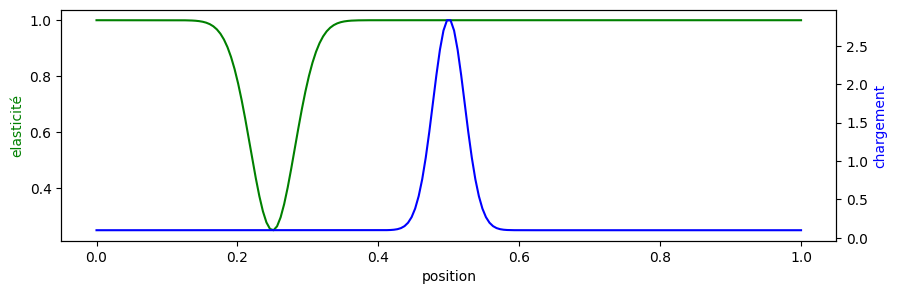

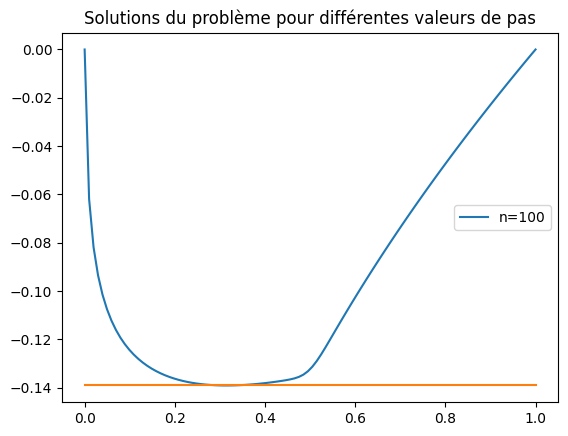

le minimum de Un, tracé sur la figure précédente est :  -0.139127865513293


In [11]:
def a(x):
    return 1 - 0.75*np.exp(-500*(x-0.25)**2)


xi1 = 0.5
xi2 = 0.5


def f(x):
    return 0.1 + 0.75*np.exp(-1000*(x-xi1)**2) + 2*np.exp(-1000*(x-xi2)**2)


fig, ax1 = plt.subplots(figsize=(10, 3))
ax2 = ax1.twinx()
x = np.linspace(0, 1, 200)
ax1.plot(x, a(x), 'g-')
ax2.plot(x, f(x), 'b-')

ax1.set_xlabel('position')
ax1.set_ylabel('elasticité', color='g')
ax2.set_ylabel('chargement', color='b')
plt.show()

#secoonde partie : resolution pour des valurs succesives de n :
n=100
h=1/(n+1)
X=np.linspace(0,1,num=n+2)
A,F=construction(n,a,f)
U=la.solve(A,F)
plt.plot(X,np.concatenate((np.array([0]),U,np.array([0])),axis=None),label="n="+str(n))
plt.plot(X,[min(U) for i in range(n+2)])
plt.legend()
plt.title("Solutions du problème pour différentes valeurs de pas")
plt.show() 
print("le minimum de Un, tracé sur la figure précédente est : ",min(U))

## Stockage creux

En grande dimension, le temps de calcul nécessaire pour construire la matrice $A$ puis pour résoudre le système linéaire $AU=F$ devient important. C'est d'autant plus vrai si le problème considéré décrit une physique en dimension d'espace grande (pour l'étude d'une membrane ou d'une structure volumique élastique).  

Nous allons dans la suite utiliser une stratégie de résolution adaptée aux propriétés de la matrice $A$ qui intervient. De nombreuses stratégies sont possibles mais un gain d'efficacité conséquent s'obtient en mettant à profit la **structure creuse** de cette matrice, c'est à dire en adaptant le stockage des variables, les produits matrices-vecteurs et les algorithmes de résolution de façon à ne pas tenir compte des très nombreux éléments nuls de $A$. Cette matrice est ici tridiagonale.  

La librairie [`scipy.sparse`](https://docs.scipy.org/doc/scipy/reference/sparse.html) fournit différents stockages creux et des algorithmes d'algèbre linéaires adaptés.

### Exemple préliminaire

Tester les trois cellules de code suivantes et commentez.

In [2]:
import numpy as np
import numpy.linalg as la
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve

print('Stockage plein')

V = np.diag(np.arange(5.), 1)
print(V)

print('--')
print('Stockage creux')

Vsp = sp.diags(np.arange(5.), 1)
print(Vsp)

Stockage plein
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 4.]
 [0. 0. 0. 0. 0. 0.]]
--
Stockage creux
<DIAgonal sparse matrix of dtype 'float64'
	with 5 stored elements (1 diagonals) and shape (6, 6)>
  Coords	Values
  (1, 2)	1.0
  (2, 3)	2.0
  (3, 4)	3.0
  (4, 5)	4.0


**Commentaire**. On voit avec le programme précédent que le stockage plein stocke toutes les "cases" d'une matrice donc stocke $n^2$ données alors que le stockage creux stocke seulement les "cases" de la matrice non nulles, et donc dans le cas d'une matrice tridiagonale : $3n-2$ cases au lieu de $n^2$, et dans le cas présent, seulemnt 4 cases au lieu de 25





In [3]:
%%time
n = 2000
A = np.eye(n, n)
x = np.ones(n)
y = la.solve(A, x)
print(y)

[1. 1. 1. ... 1. 1. 1.]
CPU times: user 141 ms, sys: 45.2 ms, total: 186 ms
Wall time: 184 ms


In [4]:
%%time
n = 200000
A = sp.eye(n, n, format='csr')
x = np.ones((n, 1))
y = spsolve(A, x)
print(y)

[1. 1. 1. ... 1. 1. 1.]
CPU times: user 38.5 ms, sys: 79 ms, total: 118 ms
Wall time: 116 ms


**Commentaire**. 
On voit avec cet exemple : dans le premier cas on résoud numériquement un système numerique classiquement, avec le stockage plein pour un système de 2000 coordonnées, ce qui prends 184 ms au CPU à calculer. Pour le second exemple, on résoud un système nuémrique de taille 2000000, soit 1000 fois plus grand que le système de l'exemple précédent avec  le format de stockage creux et on observe que ce système est résolu en 116 ms, soir plsu rapidemetn que le permier alors que beaucoup plus grand. Ainsi le système de stockage vreux permet de réoudre des systèmes linéaires beaucoup plus rapidement, et d'ainsi pouvoir résoudre des systèmes de grandes taille qui serait sinon difficilement soluble car prendrait trop de temps avec la méthode de stockage pleine.





### Adaptation du code pour le problème d'élasticité

Dans la suite, nous utiliserons systématiquement ce stockage creux plutôt qu'un stockage plein.  

La fonction `construction` précédemment mise en place a été réécrite de façon adaptée en une nouvelle fonction `constructionSP` définie par:
```python
def constructionSP(n,a,f):
    h = 1./(n+1)
    x = np.arange(0,n+2)*h
    vec = a((0.5+np.arange(n+1))*h)
    A = (sp.diags(vec[1:-1],1,format='csr')+sp.diags(vec[1:-1],-1,format='csr')-sp.diags(vec[:-1]+vec[1:],format='csr'))/h**2
    F = f(x[1:-1])
    return A,F
```

In [17]:
def constructionSP(n,a,f):
    h = 1./(n+1)
    x = np.arange(0,n+2)*h
    vec = a((0.5+np.arange(n+1))*h)
    A = (sp.diags(vec[1:-1],1,format='csr')+sp.diags(vec[1:-1],-1,format='csr')-sp.diags(vec[:-1]+vec[1:],format='csr'))/h**2
    F = f(x[1:-1])
    return A,

--- 
**Question 9.**  
Comparer les matrices pleines et creuses obtenues pour $n=5$ et une élasticité $a(x)\equiv1$.

In [20]:
print("La matrice pleine obtenue est : ")
def a1(x):
    return 1
A,F=construction(5,a1,f)
print(A)
print("La matrice creuse obtenue est : ")
A2=constructionSP(5,a1,f)
print(A2)

La matrice pleine obtenue est : 
[[-12.   9.   0.   0.   0.]
 [  9. -24.  15.   0.   0.]
 [  0.  15. -36.  21.   0.]
 [  0.   0.  21. -48.  27.]
 [  0.   0.   0.  27. -66.]]
La matrice creuse obtenue est : 


TypeError: 'int' object is not subscriptable

--- 
**Question 10.**  
Résoudre et représenter la corde pour le cas inhomogène avec des masses localisées en $\xi_1=0.2$ et $\xi_2=0.8$. On ne lésinera pas sur la dimension maintenant que le stockage et les calculs sont creux.

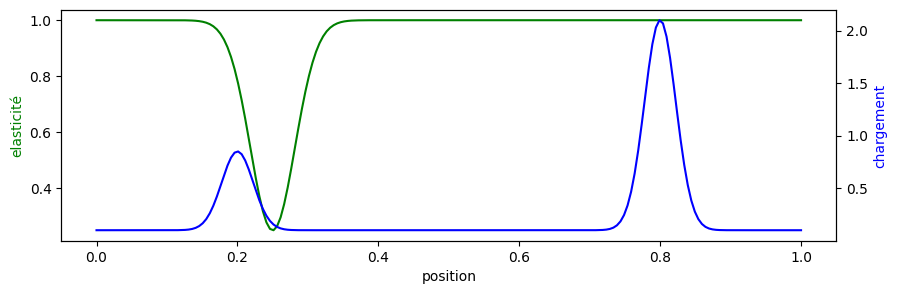

ValueError: unrecognized csc_array constructor input: (<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13 stored elements and shape (5, 5)>,)

In [23]:
def a(x):
    return 1 - 0.75*np.exp(-500*(x-0.25)**2)


xi1 = 0.2
xi2 = 0.8


def f(x):
    return 0.1 + 0.75*np.exp(-1000*(x-xi1)**2) + 2*np.exp(-1000*(x-xi2)**2)


fig, ax1 = plt.subplots(figsize=(10, 3))
ax2 = ax1.twinx()
x = np.linspace(0, 1, 200)
ax1.plot(x, a(x), 'g-')
ax2.plot(x, f(x), 'b-')

ax1.set_xlabel('position')
ax1.set_ylabel('elasticité', color='g')
ax2.set_ylabel('chargement', color='b')
plt.show()

#secoonde partie : resolution pour des valurs succesives de n :
for n in [5,10,20,30,50,100,1000,10000,100000,1000000]:
    h=1/(n+1)
    X=np.linspace(0,1,num=n+2)
    A=constructionSP(n,a,f)
    fvect=np.vectorize(f)
    F=fvect(X)
    F=F[:-1]
    F=F[1:]
    U=spsolve(A,F)
    plt.plot(X,np.concatenate((np.array([0]),U,np.array([0])),axis=None),label="n="+str(n))
plt.plot(X,[min(U) for i in range(n+2)])
plt.legend()
plt.title("Solutions du problème pour différentes valeurs de pas")
plt.show() 
print("le minimum de Un, tracé sur la figure précédente est : ",min(U)) 

### Positionnement optimal de la première masse

La seconde charge est supposée fixée à la position $\xi_2=0.8$. On souhaite maintenant optimiser la position $\xi_1$ de la première masse de façon à maximiser l'amplitude de la corde, autrement dit, à minimiser la quantité (négative) $\min_{x\in[0,1]} u(x)$.

---  
**Question 11.**  
Tester et décrypter la commande suivante:
```python
test = (np.linspace(0,10,11)-5.)**2
print(test,' min ',np.min(test))
np.where(test == np.min(test))[0][0]
```

---  
**Question 12.**  
Proposer et mettre en œuvre un procédé numérique de votre choix qui aborder le problème de positionnement optimal de la première masse.

### Positionnement optimal des deux masses

Cette fois-ci les deux positions $\xi_1\in[0,1]$ et $\xi_2\in[0,1]$ sont à optimiser.  

Pour des représentations graphiques de lignes de niveau de fonctions de deux variables, on pourra parcourir les exemples d'utilisation de la fonction [`matplotlib.contour`](https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html) et utiliser la commande [`numpy.meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html).

---  
**Question 13.**  
Résoudre le problème de positionnement optimal des deux masses.